<a href="https://colab.research.google.com/github/Rish-5k/RishRepository/blob/main/Clash_Royale_Data_Intern_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Firstly unleashing my logo leveraging my tactical marketing skill to promote my analytical skills 😎**

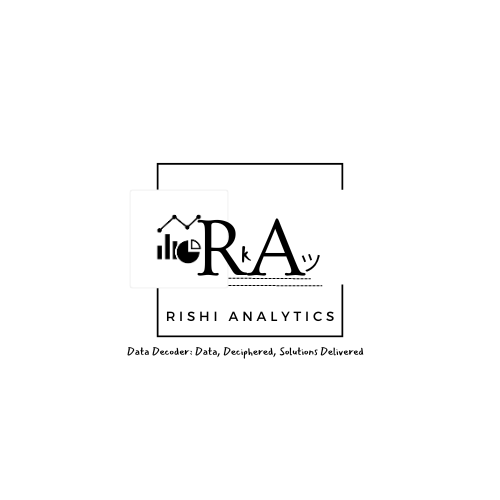

In [50]:
from IPython.display import Image
Image('/content/RkA Logo.png')

#**Clash Royale Game Dataset Analysis**

---





This project aimed to analyze sales data obtained from a SQLite database containing information about in-app purchases across various countries. The dataset included details like revenue generated per country, user distribution, and other metrics related to the performance of in-app purchases. The objective was to explore the geographic split of revenue and users, calculate the average revenue per user per market, and draw valuable insights from the analysis to aid in strategic decision-making.

##Starting the analysis by importing important libraries and loading the provided dataset:

In [47]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

Establishing connection to the SQLite database using the sqlite3 library in Python.

In [2]:
conn = sqlite3.connect('sample.sqlite')

Creating a cursor object cursor using the connection conn. The cursor is a control structure that allows Python code to execute SQL commands in the database.

In [3]:
# Create a cursor object.
cursor = conn.cursor()

# Execute the SQL query to list all tables in the database.
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch and print the table names.
tables = cursor.fetchall()
for table in tables:
    print(table[0])

account
iap_purchase
account_date_session


##Initial EDA (Exploratory Data Analysis) Process:

In [4]:
for table in tables:
    table_name = table[0]
    columns_query = f"PRAGMA table_info({table_name});"
    cursor.execute(columns_query)
    columns = cursor.fetchall()
    print(f"Columns in table '{table_name}':")
    for column in columns:
        print(column[1])  # Prints the column name

Columns in table 'account':
account_id
created_time
created_device
created_platform
country_code
created_app_store_id
Columns in table 'iap_purchase':
account_id
created_time
package_id_hash
iap_price_usd_cents
app_store_id
Columns in table 'account_date_session':
account_id
date
session_count
session_duration_sec


In [5]:
# Using Pandas to read SQL queries into dataframes.
account_df = pd.read_sql_query("SELECT * FROM account", conn)
session_df = pd.read_sql_query("SELECT * FROM account_date_session", conn)
purchase_df = pd.read_sql_query("SELECT * FROM iap_purchase", conn)

In [6]:
account_df.head()

,account_id,created_time,created_device,created_platform,country_code,created_app_store_id
0,13514010,2016-03-02 17:11:00.332,"iPhone6,2",iOS,GB,1
1,4308483975,2016-03-02 20:57:46.14,MIDC147PJ,Android,FR,2
2,17193137415,2016-03-02 13:52:16.735,SM-G360F,Android,IT,2
3,21488104920,2016-03-02 12:43:27.899,H60-L01,Android,CN,8
4,21488107995,2016-03-02 17:20:12.145,GT-I9500,Android,RU,2


In [7]:
session_df.head()


,account_id,date,session_count,session_duration_sec
0,68730811144,2016-01-01,1,47
1,68730812806,2016-01-01,1,204
2,68730829426,2016-01-01,12,4703
3,68730829426,2016-01-02,9,4676
4,68730829426,2016-01-03,9,2271


In [ ]:
purchase_df.head()

,account_id,created_time,package_id_hash,iap_price_usd_cents,app_store_id
0,30077202816,2016-03-26 23:59:59.355,ae0253c27c34edd1ab4fe21d6bfc91f8,739,0
1,30077202816,2016-05-31 11:24:37.283,dd4c1bda4f2c904075fb2fbfcf30f30e,369,0
2,21487283560,2016-02-13 03:40:28.644,99a9e0e63efa2fdce8fc8de74c66cea9,184,0
3,21487152816,2016-02-28 00:53:26.678,99a9e0e63efa2fdce8fc8de74c66cea9,184,0
4,8602037685,2016-02-11 01:03:04.727,99a9e0e63efa2fdce8fc8de74c66cea9,184,0


In [8]:
# Grouping the data by date and count distinct user IDs to calculate DAU.
daily_dau = session_df.groupby('date')['account_id'].nunique()
print(daily_dau)

date
2016-01-01    1083
2016-01-02    1558
2016-01-03    1872
2016-01-04    1884
2016-01-05    2068
              ... 
2016-12-27    4421
2016-12-28    4436
2016-12-29    4493
2016-12-30    4669
2016-12-31    4873
Name: account_id, Length: 366, dtype: int64


In [9]:
# Calculating Total Instances:
total_instances = daily_dau.shape[0]  # Access the first value in the tuple returned by 'shape'
print("Total instances in the DataFrame:", total_instances)


Total instances in the DataFrame: 366


In [10]:
account_df.head()

,account_id,created_time,created_device,created_platform,country_code,created_app_store_id
0,13514010,2016-03-02 17:11:00.332,"iPhone6,2",iOS,GB,1
1,4308483975,2016-03-02 20:57:46.14,MIDC147PJ,Android,FR,2
2,17193137415,2016-03-02 13:52:16.735,SM-G360F,Android,IT,2
3,21488104920,2016-03-02 12:43:27.899,H60-L01,Android,CN,8
4,21488107995,2016-03-02 17:20:12.145,GT-I9500,Android,RU,2


In [11]:
# Display the column names in the iap_purchase DataFrame
print(purchase_df.columns)

Index(['account_id', 'created_time', 'package_id_hash', 'iap_price_usd_cents',
       'app_store_id'],
      dtype='object')


In [12]:
# Assuming DataFrames: account_df, session_df, purchase_df
dataframes = [account_df, session_df, purchase_df]

# Calculating total rows and columns across all DataFrames
total_rows = sum(df.shape[0] for df in dataframes)
total_columns = sum(df.shape[1] for df in dataframes)

print("Total rows across all DataFrames:", total_rows)
print("Total columns across all DataFrames:", total_columns)

Total rows across all DataFrames: 1821675
Total columns across all DataFrames: 15


In [13]:
# Display the column names in the purchase_df DataFrame
print(purchase_df.columns)

Index(['account_id', 'created_time', 'package_id_hash', 'iap_price_usd_cents',
       'app_store_id'],
      dtype='object')


##**2.1 Analyzing DAU (Daily Active Users):**

In [26]:
import matplotlib.dates as mdates  # Import the mdates module for date formatting

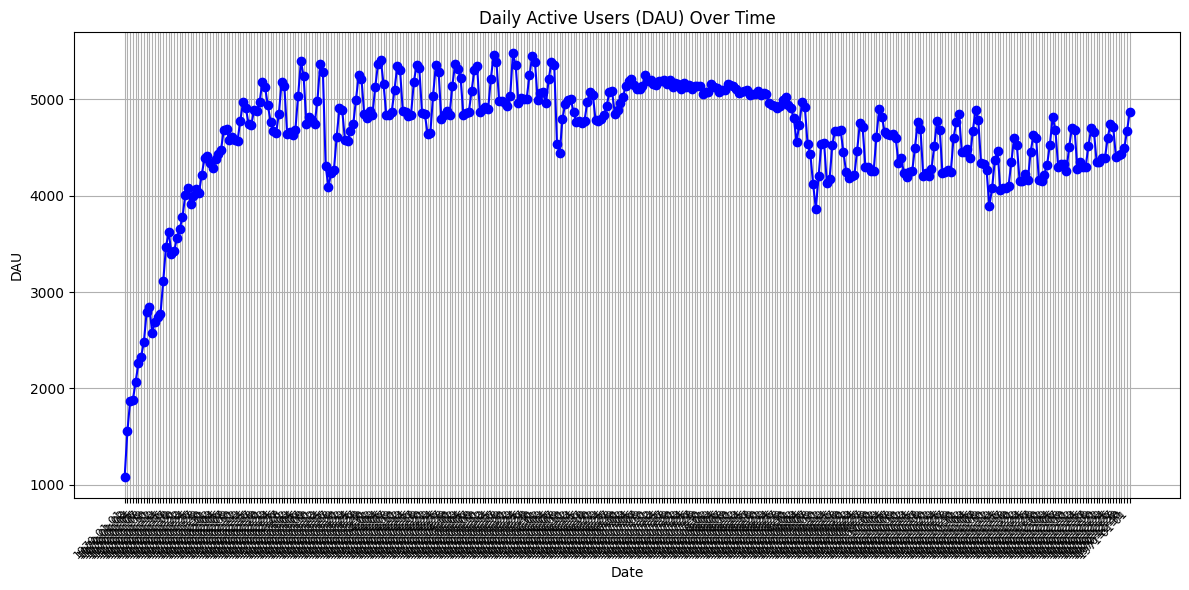

In [27]:
plt.figure(figsize=(12, 6), dpi=100)  # Increase figure DPI
plt.plot(daily_dau.index, daily_dau.values, marker='o', linestyle='-', color='b')
plt.title('Daily Active Users (DAU) Over Time')
plt.xlabel('Date')
plt.ylabel('DAU')
plt.grid(True)
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and adjust font size
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Date formatting
plt.tight_layout()
plt.show()

As we can see that plotting the entire dataset (366 instances) is rendering the date on the x axis to be unclear. So, I will plot the instances in the sample size of 50 users (subset) per plotting using Iterative Data Processing whereby processing and visualizing smaller subsets of data.

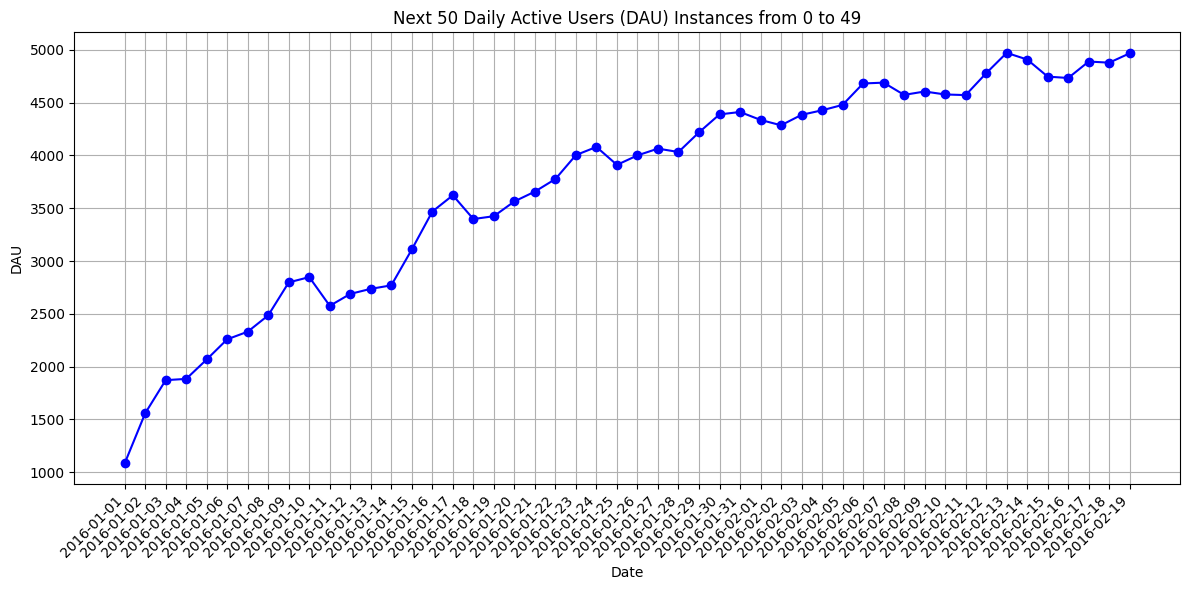

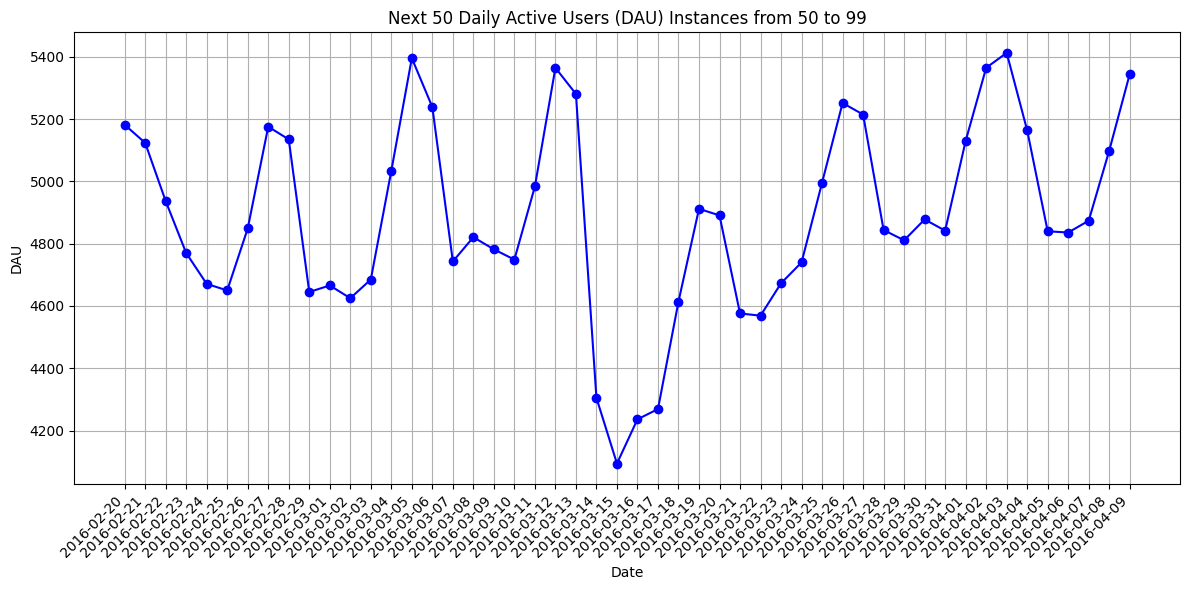

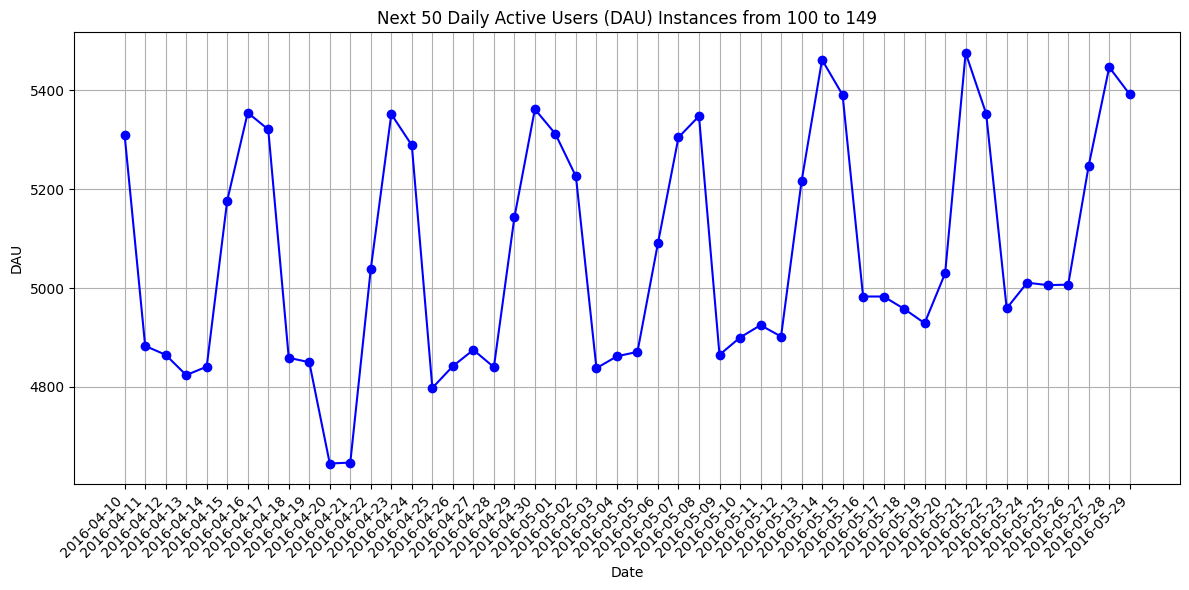

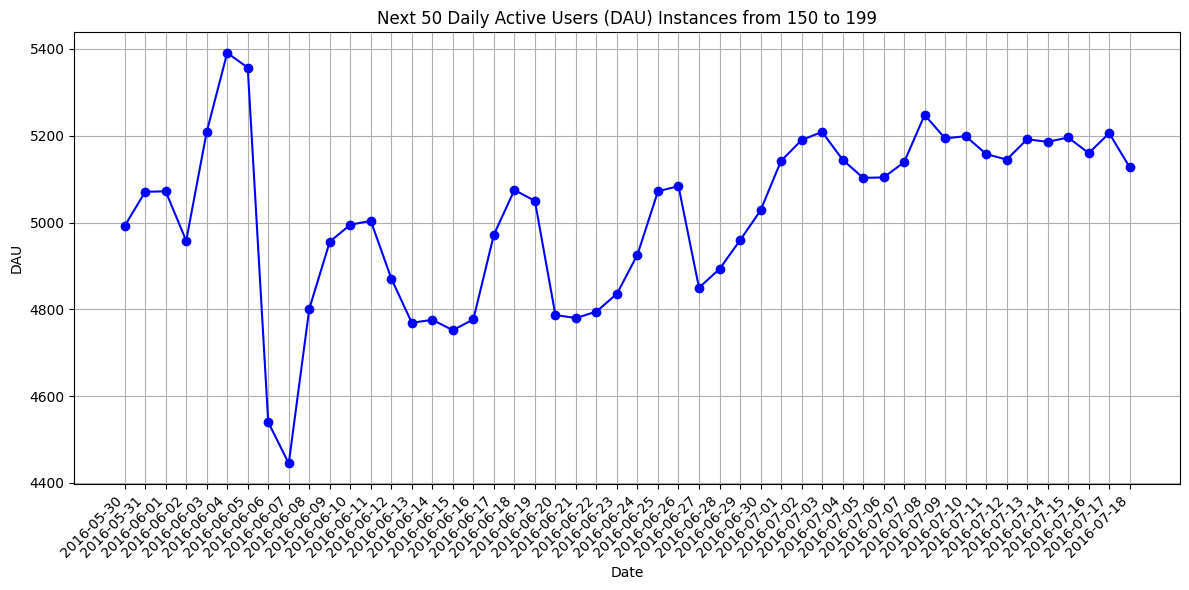

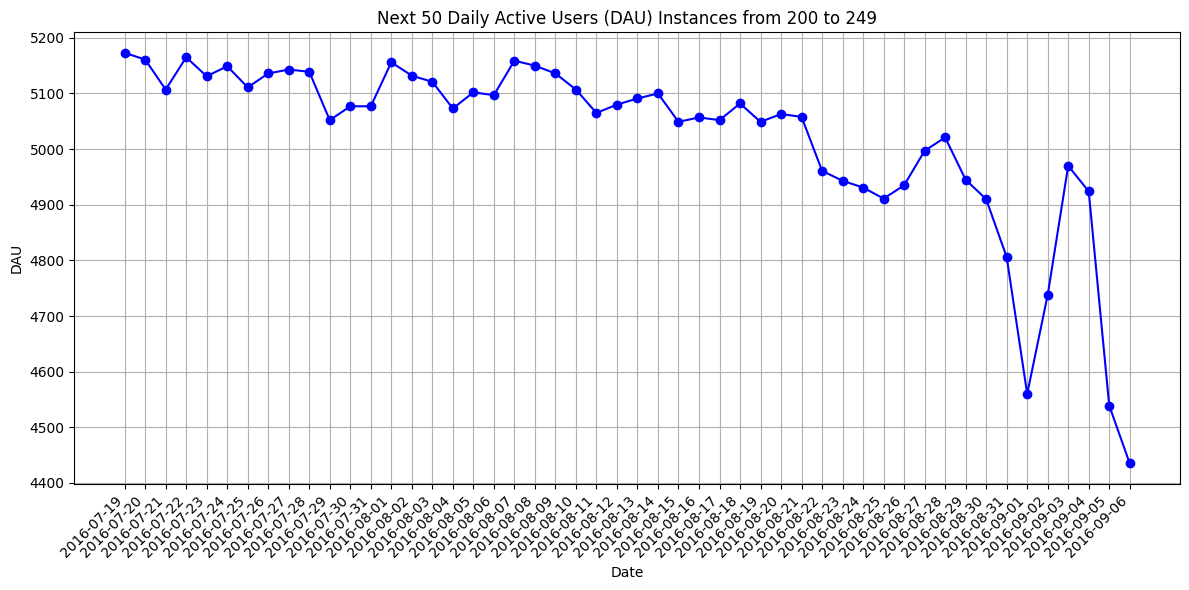

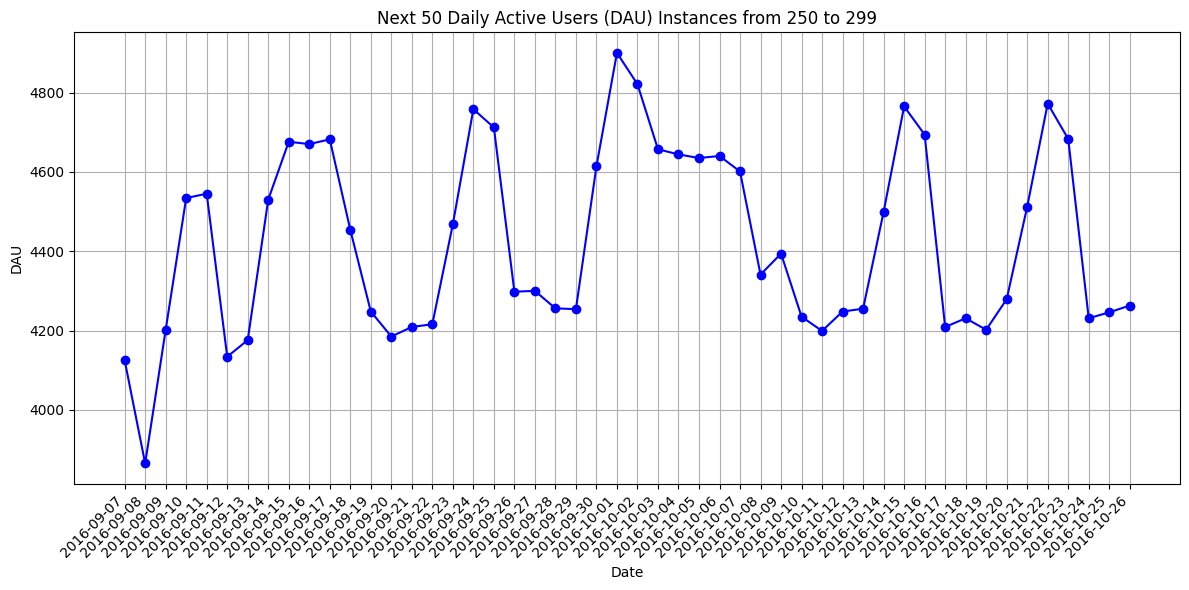

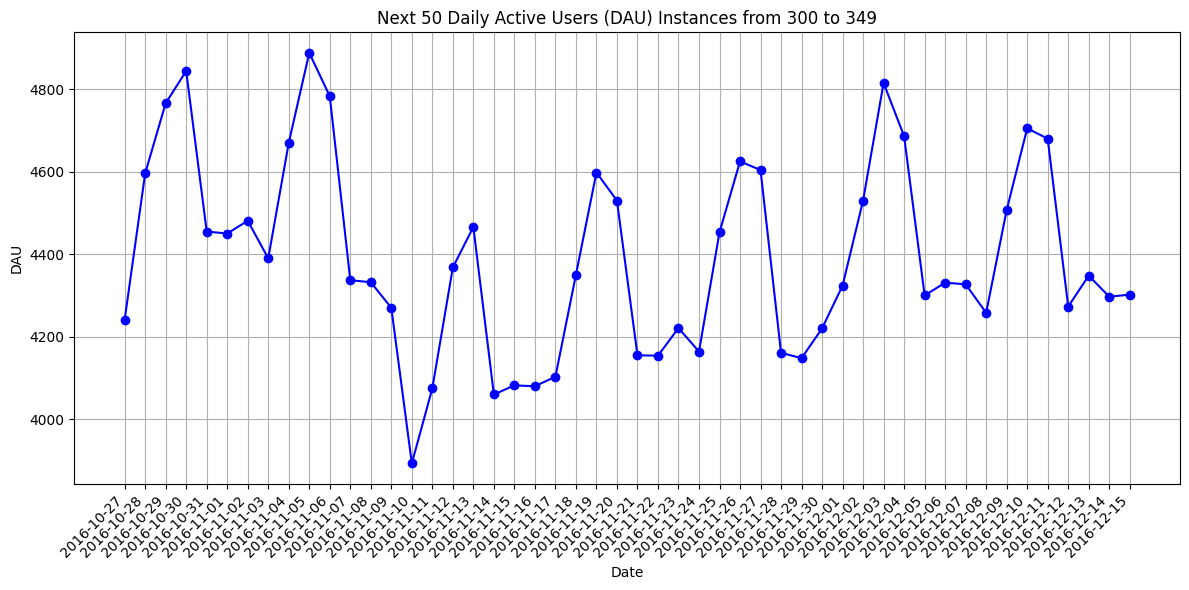

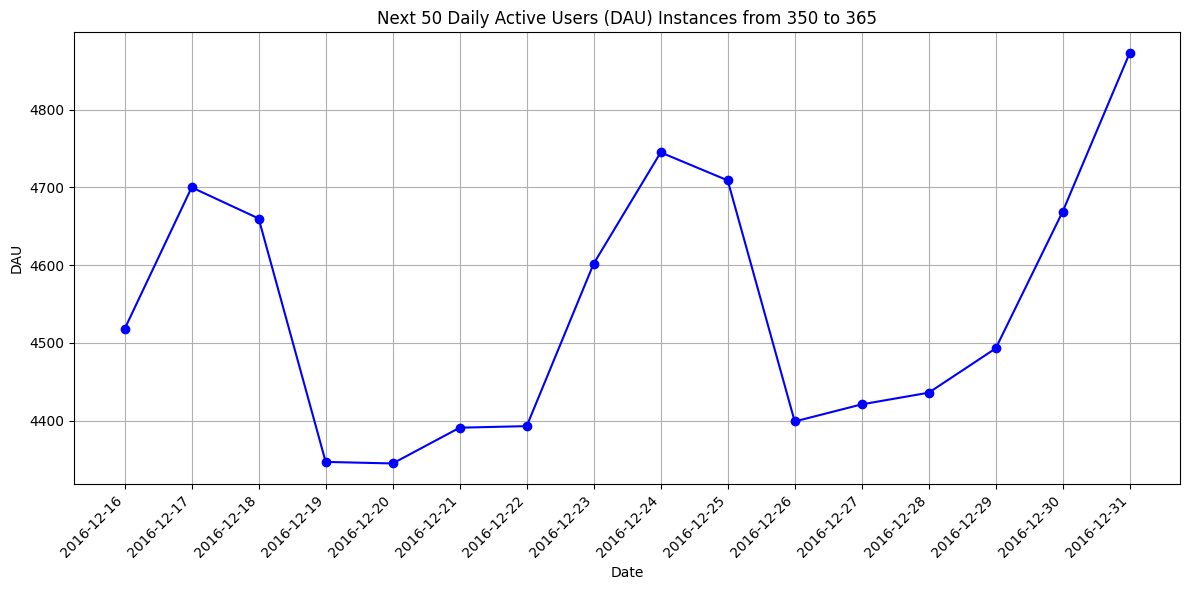

In [28]:
start_index = 0
subset_size = 50

while start_index < len(daily_dau):
    end_index = min(start_index + subset_size, len(daily_dau))
    next_subset_dau = daily_dau.iloc[start_index:end_index]

    # Plot the subset of data points
    plt.figure(figsize=(12, 6))
    plt.plot(next_subset_dau.index, next_subset_dau.values, marker='o', linestyle='-', color='b')
    plt.title(f'Next 50 Daily Active Users (DAU) Instances from {start_index} to {end_index - 1}')
    plt.xlabel('Date')
    plt.ylabel('DAU')
    plt.grid(True)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Update start_index for the next iteration
    start_index = end_index


In [29]:
# Calculate mean and standard deviation for Daily Active Users (DAU)
mean = daily_dau.mean()
std_dev = daily_dau.std()

# Display mean and standard deviation
print("Mean:", mean)
print("Standard Deviation:", std_dev)

Mean: 4642.005464480874
Standard Deviation: 628.2691029514998


The Mean Daily Active Users (DAU) is 4642.005, indicating the average number of users engaged with the application per day. The Standard Deviation (SD) of 628.269 suggests the variability or spread of the DAU values around the mean. This SD indicates that most of the DAU values are within approximately plus or minus 628 from the mean value, following a normal distribution pattern.

##**3. Analyzing Revenue Generation:**

In [30]:
# Merge the purchase_df and account_df DataFrames on 'account_id'
merged_df = pd.merge(purchase_df, account_df, on='account_id', how='inner')

# Group merged data by 'country_code' and calculate revenue by country
revenue_by_country = merged_df.groupby('country_code')['iap_price_usd_cents'].sum()

# Count the number of users per country in the merged data
users_by_country = merged_df['country_code'].value_counts()

# Display the revenue by country and user distribution per country
print("Revenue by Country:")
print(revenue_by_country)

# Display the sorted user distribution by country
print("User Distribution by Country (Descending Order):")
print(users_by_country)

# Sort revenue by country from highest to lowest
revenue_by_country_sorted_desc = revenue_by_country.sort_values(ascending=False)
print("\nRevenue by country (highest to lowest):\n", revenue_by_country_sorted_desc)

Revenue by Country:
country_code
AE       1953
AR        920
AT      28471
AU      45066
BE       1291
BH       1475
BR       8598
CA     254506
CH     182774
CN    1136507
CO      45860
CY        368
CZ       1289
DE      94621
DK       4976
DO        184
EG        110
ES      17581
FI       4061
FR     152739
GB     145086
GR       5543
ID        368
IE        552
IL        184
IN        184
IQ        368
IT      15230
JP      14041
KH        738
KR     463518
KW       2954
MX       6266
MY        184
NL       7598
NZ       6093
PA        184
PL       1399
PT       2211
RE       2033
RU      30102
SA      32092
SE      16420
SG       1290
TR     193339
UA       1473
US    1314818
VE        369
ZA       1478
Name: iap_price_usd_cents, dtype: int64
User Distribution by Country (Descending Order):
CN    4610
US    2345
KR     536
GB     435
CA     387
FR     367
DE     210
TR     208
AU     148
CH     117
RU      90
SA      61
IT      51
SE      45
ES      31
NL      24
MX      24
BR   

In [31]:
# Provided revenue data
revenue_by_country = {
    'AE': 1953, 'AR': 920, 'AT': 28471, 'AU': 45066, 'BE': 1291, 'BH': 1475, 'BR': 8598, 'CA': 254506,
    'CH': 182774, 'CN': 1136507, 'CO': 45860, 'CY': 368, 'CZ': 1289, 'DE': 94621, 'DK': 4976, 'DO': 184,
    'EG': 110, 'ES': 17581, 'FI': 4061, 'FR': 152739, 'GB': 145086, 'GR': 5543, 'ID': 368, 'IE': 552,
    'IL': 184, 'IN': 184, 'IQ': 368, 'IT': 15230, 'JP': 14041, 'KH': 738, 'KR': 463518, 'KW': 2954,
    'MX': 6266, 'MY': 184, 'NL': 7598, 'NZ': 6093, 'PA': 184, 'PL': 1399, 'PT': 2211, 'RE': 2033,
    'RU': 30102, 'SA': 32092, 'SE': 16420, 'SG': 1290, 'TR': 193339, 'UA': 1473, 'US': 1314818, 'VE': 369,
    'ZA': 1478
}

# Calculate total revenue
total_revenue = sum(revenue_by_country.values())
print(f"Total Revenue: {total_revenue}")


Total Revenue: 4249465


In [32]:
total_revenue = 4249465

# Calculate the revenue contributed by US and China
revenue_us = revenue_by_country.get('US', 0)
revenue_china = revenue_by_country.get('CN', 0)

# Calculate percentage contribution of US and China to total revenue
percentage_us = (revenue_us / total_revenue) * 100
percentage_china = (revenue_china / total_revenue) * 100

print(f"Percentage contribution of US to total revenue: {percentage_us:.2f}%")
print(f"Percentage contribution of China to total revenue: {percentage_china:.2f}%")

Percentage contribution of US to total revenue: 30.94%
Percentage contribution of China to total revenue: 26.74%


In [33]:
# Check column names in the DataFrame
print(merged_df.columns)

Index(['account_id', 'created_time_x', 'package_id_hash',
       'iap_price_usd_cents', 'app_store_id', 'created_time_y',
       'created_device', 'created_platform', 'country_code',
       'created_app_store_id'],
      dtype='object')


In [34]:
# Merge the purchase_df and account_df DataFrames on 'account_id'
merged_df = pd.merge(purchase_df, account_df, on='account_id', how='inner')

# Calculate revenue by country
revenue_by_country = merged_df.groupby('country_code')['iap_price_usd_cents'].sum()
users_by_country = merged_df['country_code'].value_counts()

# Calculate average revenue per user per market
average_revenue_per_user = revenue_by_country / users_by_country
print("\nAverage Revenue per User per Market:")
print(average_revenue_per_user)

# Sort average revenue per user by country from highest to lowest
average_revenue_per_user_sorted_desc = average_revenue_per_user.sort_values(ascending=False)
print("Average revenue per user by country (highest to lowest):\n", average_revenue_per_user_sorted_desc)


Average Revenue per User per Market:
AE     244.125000
AR     184.000000
AT    1498.473684
AU     304.500000
BE     322.750000
BH     295.000000
BR     373.826087
CA     657.638243
CH    1562.170940
CN     246.530803
CO    2293.000000
CY     184.000000
CZ     214.833333
DE     450.576190
DK     261.894737
DO     184.000000
EG     110.000000
ES     567.129032
FI     451.222222
FR     416.182561
GB     333.531034
GR     791.857143
ID     184.000000
IE     184.000000
IL     184.000000
IN     184.000000
IQ     184.000000
IT     298.627451
JP     739.000000
KH     369.000000
KR     864.772388
KW     492.333333
MX     261.083333
MY     184.000000
NL     316.583333
NZ     507.750000
PA     184.000000
PL     199.857143
PT     245.666667
RE    1016.500000
RU     334.466667
SA     526.098361
SE     364.888889
SG     258.000000
TR     929.514423
UA     210.428571
US     560.689979
VE     369.000000
ZA     739.000000
dtype: float64
Average revenue per user by country (highest to lowest):
 CO    2

In [35]:
# Check the column names in the DataFrame
print(merged_df.columns)

Index(['account_id', 'created_time_x', 'package_id_hash',
       'iap_price_usd_cents', 'app_store_id', 'created_time_y',
       'created_device', 'created_platform', 'country_code',
       'created_app_store_id'],
      dtype='object')


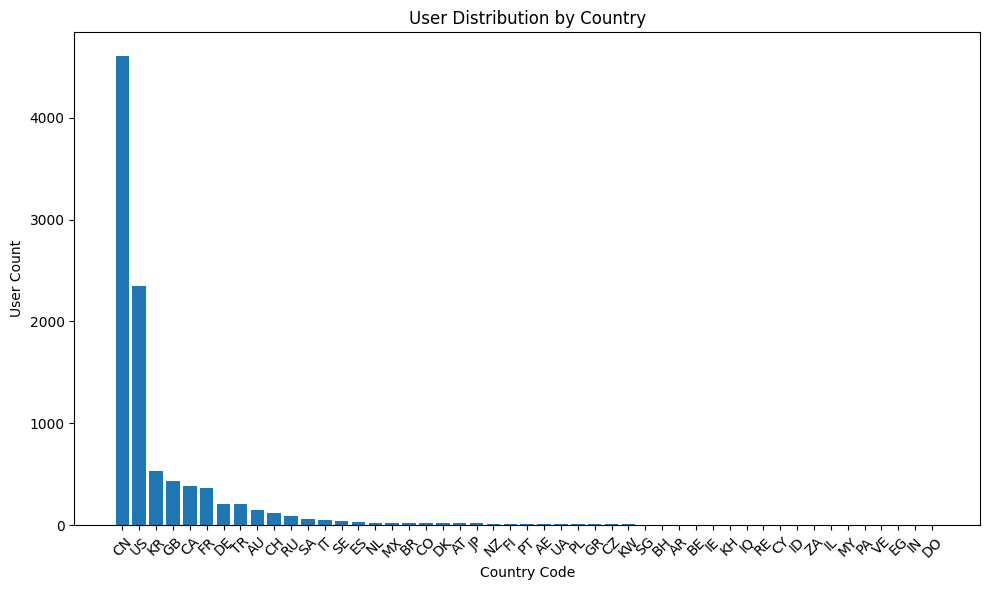

In [36]:
users_by_country = merged_df['country_code'].value_counts().reset_index()
users_by_country.columns = ['country_code', 'user_count']

# Plotting user distribution using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(users_by_country['country_code'], users_by_country['user_count'])
plt.xlabel('Country Code')
plt.ylabel('User Count')
plt.title('User Distribution by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

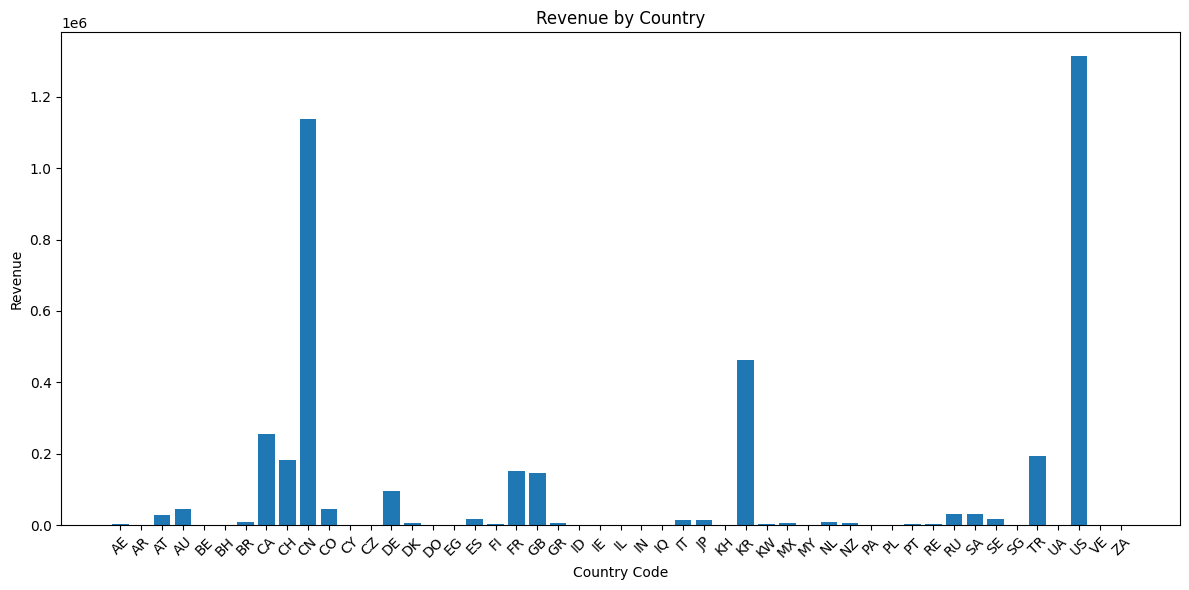

In [40]:
# Assuming merged_df contains the required columns and data
revenue_by_country = merged_df.groupby('country_code')['iap_price_usd_cents'].sum().reset_index()

# Plotting revenue by country using a bar chart
plt.figure(figsize=(12, 6))
plt.bar(revenue_by_country['country_code'], revenue_by_country['iap_price_usd_cents'])
plt.xlabel('Country Code')
plt.ylabel('Revenue')
plt.title('Revenue by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

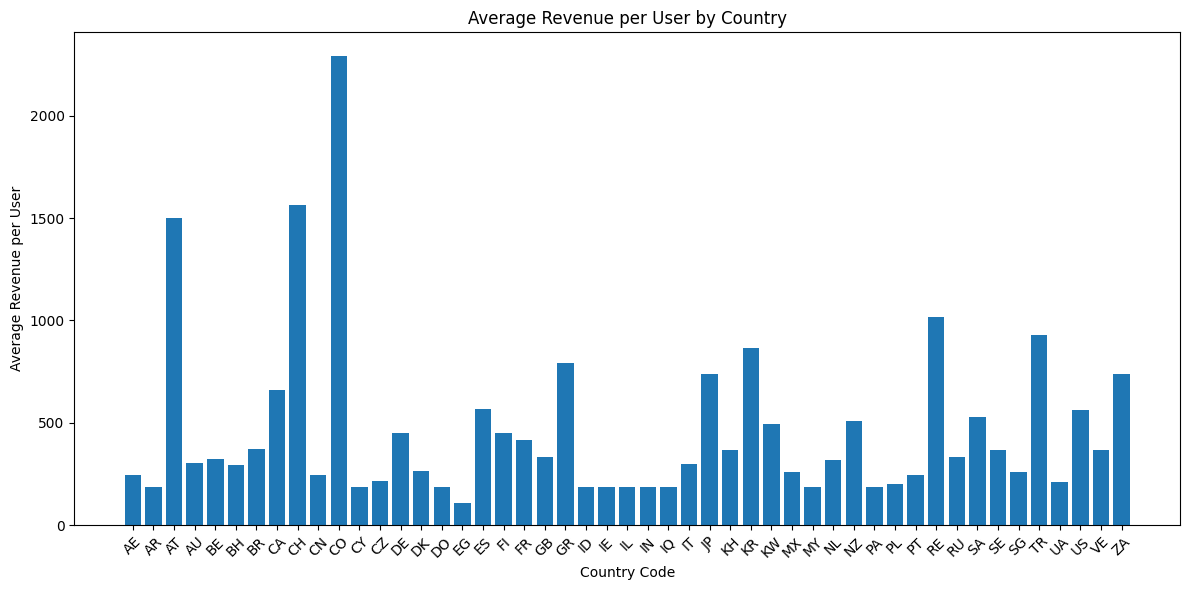

In [42]:
# Plotting average revenue per user by country
plt.figure(figsize=(12, 6))
plt.bar(average_revenue_per_user.index, average_revenue_per_user.values)
plt.xlabel('Country Code')
plt.ylabel('Average Revenue per User')
plt.title('Average Revenue per User by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##**Conclusion**:
The analysis provided crucial insights into the revenue generated across different countries, user distribution by country, and average revenue per user per market. This comprehensive evaluation revealed diverse patterns in revenue generation and user behavior across regions. The findings highlighted the significance of certain markets, identified potential growth opportunities, and underscored the importance of optimizing user engagement strategies. The analysis serves as a valuable resource for business strategies, emphasizing the need for tailored approaches to maximize revenue and user engagement across diverse global markets.

#***Special thanks to the Supercell for providing the SQLite sample game dataset which facilitated the analyzing and is the backbone of this analysis*** 🤟🏼🙂.

#**RkA** Rishi Analytics ツ